# Perceptron - Analysis

### importing necessary packages

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np
import matplotlib.animation as animation
%matplotlib nbagg

# DataSet -1

### reading csv file 

In [3]:
df = pd.read_csv('datafile1.csv', header=None, names=['x1','x2','y'] )

In [4]:
df.head()

,x1,x2,y
0,0.474341,-1.164631,0
1,1.683638,-1.782302,0
2,1.589368,0.049690,1
3,-1.026358,-0.320719,0
4,0.860988,-0.168258,0


### Scatter plot highlighting the class

### Dataset 1

<IPython.core.display.Javascript object>


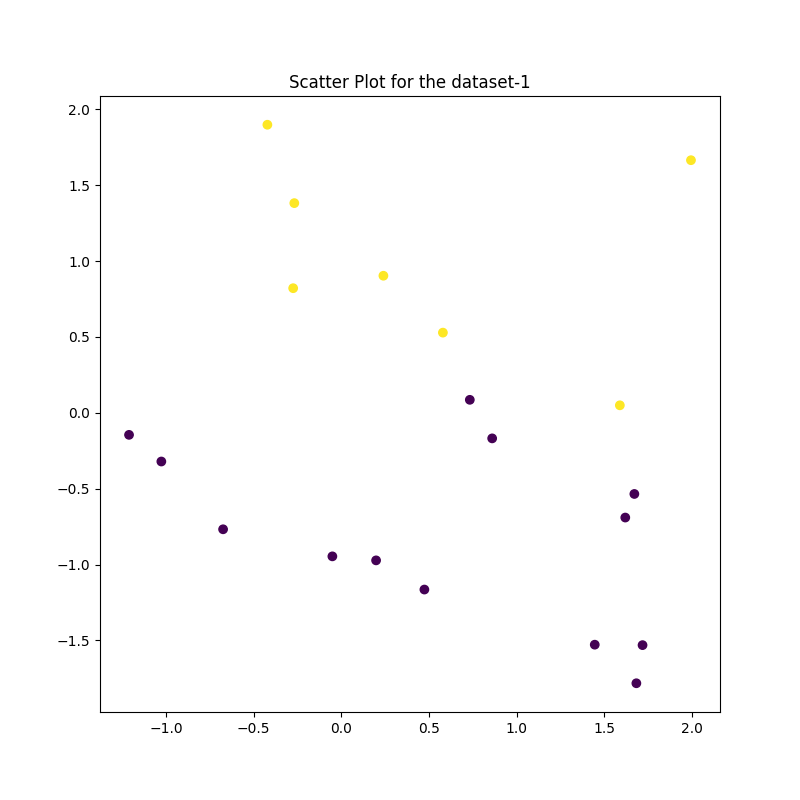

In [5]:
x1 = df['x1']
x2 = df['x2']
y = df['y']

fig = plt.figure(figsize=(8,8))
plt.scatter(x1, x2, c=y)
plt.title("Scatter Plot for the dataset-1")
plt.show()

### Observation
We can clearly see that this data can be linearly seperated

### Code for perceptron

### Creating input and output vector

In [6]:
X = np.column_stack((np.ones((20,1)),x1,x2))
Y = np.array(y).reshape(20,-1)

### Training

In [7]:
def predict_y(x, w):
    pred = x.dot(w)
    pred[pred<0] = 0
    pred[pred>0] = 1
    return pred

In [70]:
def train(X, Y, l_rate=0.003,epochs=1000):
    weights_iter = []
    W = np.random.random((3,1))
    Y_ = predict_y(X, W)
    while epochs>0:
        if(np.sum(np.abs(Y-Y_))==0):
            print(10000-epochs)
            print(Y)
            print(Y_)
            break
        delta_W = (l_rate*(Y-Y_).T.dot(X)).T
        weights_iter.append(W)
        W = W + delta_W
        Y_ = predict_y(X,W)
        epochs-=1
    return W, weights_iter

### Weights after training

In [79]:
W1, weights = train(X,Y, 10000)

10
[[0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]]
[[ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 1.]]


In [59]:
len(weights)

2746

### predicted value

In [19]:
print(predict_y(X,W1).T)


[[ 0.  0.  1.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.
   0.  1.]]


### plotting line to seperate the 2 class of output

In [20]:
def approx_func(x, w):
    return (-w[0]-(x*w[1]))/w[2]

<IPython.core.display.Javascript object>


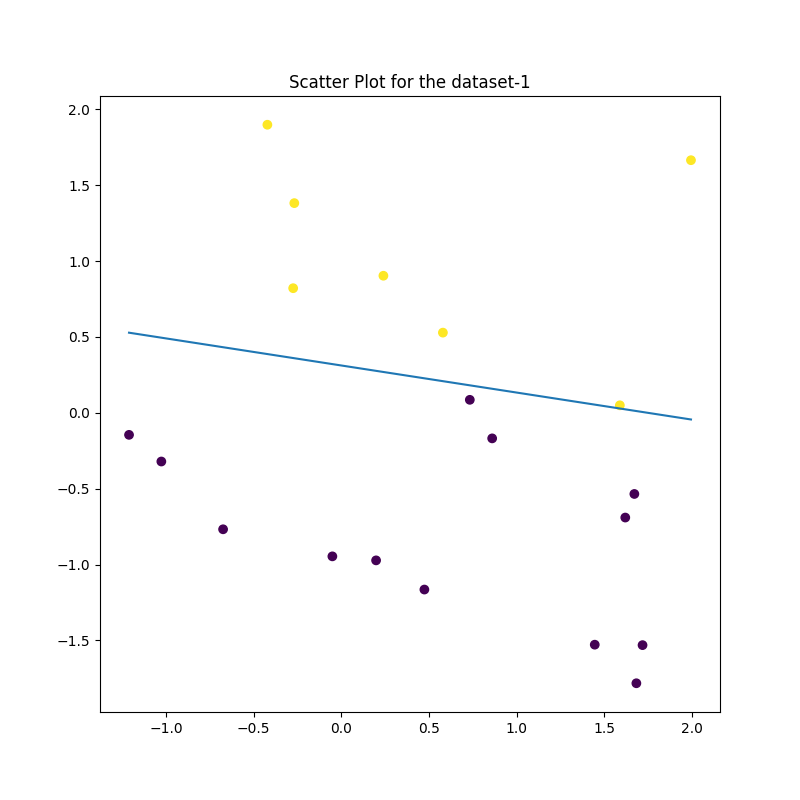

In [74]:
x1 = df['x1']
x2 = df['x2']
y = df['y']

fig = plt.figure(figsize=(8,8))
plt.scatter(x1, x2, c=y)
plt.plot([min(x1),max(x1)],[approx_func(min(x1),W1),approx_func(max(x1),W1)])
plt.title("Scatter Plot for the dataset-1")
plt.show()

### animation to show updates of weights and decision boundary 

<IPython.core.display.Javascript object>


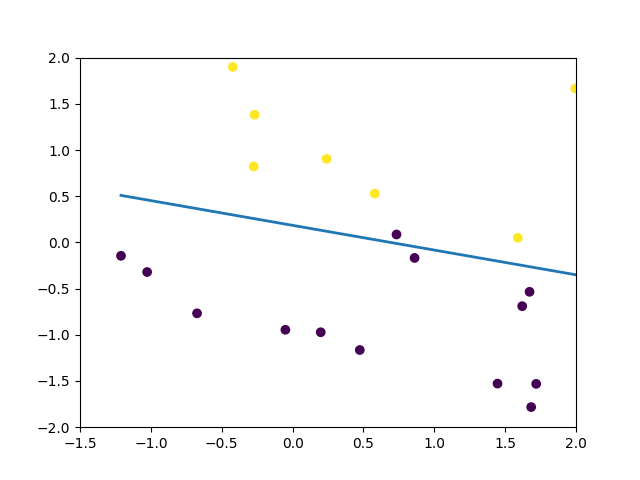

In [75]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(-1.5, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

x1 = df['x1']
x2 = df['x2']
y = df['y']
w = weights

ax.scatter(x1, x2, c=y)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = [min(x1),max(x1)]
    y = approx_func(x,w[i])
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(weights), interval=100, blit=True, repeat=False)
plt.show()

# DataSet -2

### reading csv file 

In [ ]:
df = pd.read_csv('datafile2.csv', header=None, names=['x1','x2','y'] )

In [ ]:
df.head()

### Scatter plot highlighting the class

### Dataset 2

In [ ]:
x1 = df['x1']
x2 = df['x2']
y = df['y']

fig = plt.figure(figsize=(8,8))
plt.scatter(x1, x2, c=y)
plt.title("Scatter Plot for the dataset-2")
plt.show()

### Observation
We can see that this data can not be linearly seperated

### Code for perceptron

### Creating input and output vector

In [ ]:
X = np.column_stack((np.ones((20,1)),x1,x2))
Y = np.array(y).reshape(20,-1)

### Training

In [ ]:
def predict_y(x, w):
    pred = x.dot(w)
    pred[pred<0] = 0
    pred[pred>0] = 1
    return pred

In [ ]:
def train(X, Y, l_rate=0.003):
    weights_iter = []
    W = np.random.random((3,1))
    Y_ = predict_y(X, W)
    epochs = 1000
    while epochs>0:
        delta_W = (l_rate*(Y-Y_).T.dot(X)).T
        weights_iter.append(W)
        W = W + delta_W
        Y_ = predict_y(X,W)
        epochs-=1
    return W, weights_iter

### Weights after training

In [ ]:
weights

In [ ]:
W1, weights = train(X,Y)

### predicted value

In [ ]:
print(predict_y(X,W1).T)


### plotting line to seperate the 2 class of output

In [ ]:
def approx_func(x, w):
    return (-w[0]-(x*w[1]))/w[2]

In [ ]:
x1 = df['x1']
x2 = df['x2']
y = df['y']

fig = plt.figure(figsize=(8,8))
plt.scatter(x1, x2, c=y)
plt.plot([min(x1),max(x1)],[approx_func(min(x1),W1),approx_func(max(x1),W1)])
plt.title("Scatter Plot for the dataset-2")
plt.show()

### animation to show updates of weights and decision boundary 

In [ ]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(-2, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

x1 = df['x1']
x2 = df['x2']
y = df['y']
w = weights

ax.scatter(x1, x2, c=y)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = [min(x1),max(x1)]
    y = approx_func(x,w[i])
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(weights), interval=90, blit=True, repeat=False)


plt.show()

# DataSet -3 

### reading csv file 

In [ ]:
df = pd.read_csv('datafile3.csv', header=None, names=['x1','x2','y'] )

In [ ]:
df.head()

### Scatter plot highlighting the class

### Dataset 3

In [ ]:
x1 = df['x1']
x2 = df['x2']
y = df['y']

fig = plt.figure(figsize=(8,8))
plt.scatter(x1, x2, c=y)
plt.title("Scatter Plot for the dataset-3")
plt.show()

### Observation
We can clearly see that this data can be linearly seperated

### Code for perceptron

### Creating input and output vector

In [ ]:
X = np.column_stack((np.ones((20,1)),x1,x2))
Y = np.array(y).reshape(20,-1)

### Training

In [ ]:
def predict_y(x, w):
    pred = x.dot(w)
    pred[pred<0] = 0
    pred[pred>0] = 1
    return pred

In [ ]:
def train(X, Y, l_rate=0.003):
    weights_iter = []
    W = np.random.random((3,1))
    Y_ = predict_y(X, W)
    epochs = 1000
    while epochs>0:
        delta_W = (l_rate*(Y-Y_).T.dot(X)).T
        weights_iter.append(W)
        W = W + delta_W
        Y_ = predict_y(X,W)
        epochs-=1
    return W, weights_iter

### Weights after training

In [ ]:
weights

In [ ]:
W1, weights = train(X,Y)

### predicted value

In [ ]:
print(predict_y(X,W1).T)


### plotting line to seperate the 2 class of output

In [ ]:
def approx_func(x, w):
    return (-w[0]-(x*w[1]))/w[2]

In [ ]:
x1 = df['x1']
x2 = df['x2']
y = df['y']

fig = plt.figure(figsize=(8,8))
plt.scatter(x1, x2, c=y)
plt.plot([min(x1),max(x1)],[approx_func(min(x1),W1),approx_func(max(x1),W1)])
plt.title("Scatter Plot for the dataset-3")
plt.show()

### animation to show updates of weights and decision boundary 

In [ ]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(-2, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

x1 = df['x1']
x2 = df['x2']
y = df['y']
w = weights

ax.scatter(x1, x2, c=y)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = [min(x1),max(x1)]
    y = approx_func(x,w[i])
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(weights), interval=20, blit=True)


plt.show()

# DataSet -4

### reading csv file 

In [ ]:
df = pd.read_csv('datafile4.csv', header=None, names=['x1','x2','y'] )

In [ ]:
df.head()

### Scatter plot highlighting the class

### Dataset 4

In [ ]:
x1 = df['x1']
x2 = df['x2']
y = df['y']

fig = plt.figure(figsize=(8,8))
plt.scatter(x1, x2, c=y)
plt.title("Scatter Plot for the dataset-4")
plt.show()

### Observation
We can clearly see that this data can be linearly seperated

### Code for perceptron

### Creating input and output vector

In [ ]:
X = np.column_stack((np.ones((20,1)),x1,x2))
Y = np.array(y).reshape(20,-1)

### Training

In [ ]:
def predict_y(x, w):
    pred = x.dot(w)
    pred[pred<0] = 0
    pred[pred>0] = 1
    return pred

In [ ]:
def train(X, Y, l_rate=0.003):
    weights_iter = []
    W = np.random.random((3,1))
    Y_ = predict_y(X, W)
    epochs = 1000
    while epochs>0:
        delta_W = (l_rate*(Y-Y_).T.dot(X)).T
        weights_iter.append(W)
        W = W + delta_W
        Y_ = predict_y(X,W)
        epochs-=1
    return W, weights_iter

### Weights after training

In [ ]:
weights

In [ ]:
W1, weights = train(X,Y)

### predicted value

In [ ]:
print(predict_y(X,W1).T)


### plotting line to seperate the 2 class of output

In [ ]:
def approx_func(x, w):
    return (-w[0]-(x*w[1]))/w[2]

In [ ]:
x1 = df['x1']
x2 = df['x2']
y = df['y']

fig = plt.figure(figsize=(8,8))
plt.scatter(x1, x2, c=y)
plt.plot([min(x1),max(x1)],[approx_func(min(x1),W1),approx_func(max(x1),W1)])
plt.title("Scatter Plot for the dataset-4")
plt.show()

### animation to show updates of weights and decision boundary 

In [ ]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(-2, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

x1 = df['x1']
x2 = df['x2']
y = df['y']
w = weights

ax.scatter(x1, x2, c=y)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = [min(x1),max(x1)]
    y = approx_func(x,w[i])
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(weights), interval=20, blit=True)


plt.show()